# Scikit-learn classification example
Some imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [2]:
np.random.seed(1)

## Generate some synthetic data

Text(0.5, 1.0, 'Data')

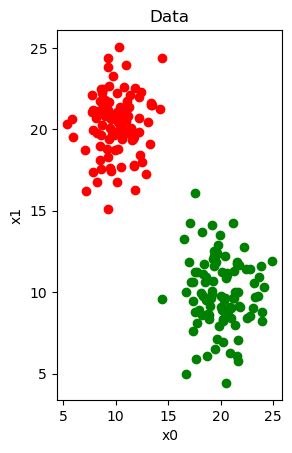

In [3]:
n_samples_per_class = 100

class0_x0_mean = 10.0
class0_x0_std = 2.0
class0_x1_mean = 20.0
class0_x1_std = 2.0

class1_x0_mean = 20.0
class1_x0_std = 2.0
class1_x1_mean = 10.0
class1_x1_std = 2.0

X = np.zeros((2 * n_samples_per_class, 2), dtype=float)
Y = np.zeros((2 * n_samples_per_class), dtype=int)

X[0:n_samples_per_class, 0] = np.random.randn(n_samples_per_class) * class0_x0_std + class0_x0_mean
X[0:n_samples_per_class, 1] = np.random.randn(n_samples_per_class) * class0_x1_std + class0_x1_mean
X[n_samples_per_class:, 0] = np.random.randn(n_samples_per_class) * class1_x0_std + class1_x0_mean
X[n_samples_per_class:, 1] = np.random.randn(n_samples_per_class) * class1_x1_std + class1_x1_mean

Y[n_samples_per_class:2 * n_samples_per_class] = np.ones((n_samples_per_class), dtype=float)

fig = plt.figure(1)
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='r', marker='o')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='g', marker='o')
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Data")

## Split into train/test

Text(0.5, 1.0, 'Split Data')

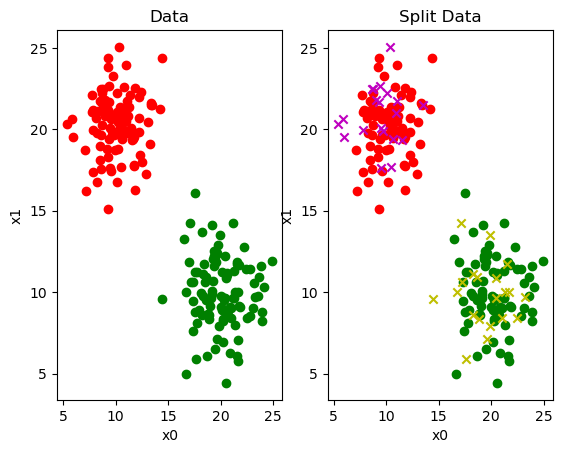

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

fig = plt.figure(1)
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='r', marker='o')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='g', marker='o')
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Data")

ax = fig.add_subplot(1, 2, 2)

ax.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], c='r', marker='o')
ax.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], c='g', marker='o')

ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c='m', marker='x')
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c='y', marker='x')

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Split Data")

## Build classifier

In [5]:
# model = LinearSVC()
model = KNeighborsClassifier()
# model = DecisionTreeClassifier()
# model = RandomForestClassifier()
# model = AdaBoostClassifier()
# model = MLPClassifier()

## Train classifier

In [6]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

## Test classifier

Text(0.5, 1.0, 'Predicted Classes')

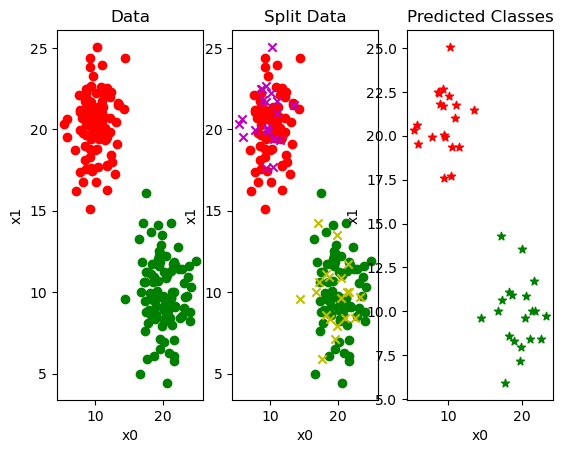

In [7]:
Y_predict = model.predict(X_test)

fig = plt.figure(1)
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='r', marker='o')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='g', marker='o')
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Data")

ax = fig.add_subplot(1, 3, 2)

ax.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], c='r', marker='o')
ax.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], c='g', marker='o')

ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c='m', marker='x')
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c='y', marker='x')

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Split Data")

ax = fig.add_subplot(1, 3, 3)

ax.scatter(X_test[Y_predict==0, 0], X_test[Y_predict==0, 1], c='r', marker='*')
ax.scatter(X_test[Y_predict==1, 0], X_test[Y_predict==1, 1], c='g', marker='*')

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Predicted Classes")

## Performance metrics

In [8]:
cm = metrics.confusion_matrix(Y_test, Y_predict, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[20  0]
 [ 0 20]]


In [9]:
prfs = metrics.precision_recall_fscore_support(Y_test, Y_predict)
print("Precision Recall F-score Support:", prfs)

Precision Recall F-score Support: (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([20, 20], dtype=int64))


In [10]:
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [11]:
cr = metrics.classification_report(Y_test, Y_predict)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

